In [4]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
import time
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [5]:
def draw_mandelbrot(x_min, x_max, y_min, y_max, res=1000, max_iter=100):
    t = time.time()
    x = np.linspace(x_min, x_max, res)
    y = np.linspace(y_min, y_max, res)
    c = np.add.outer(y * 1j, x)
    im = np.zeros_like(c, dtype=np.int16)
    converge = np.ones_like(c, dtype=np.bool)
    z = np.zeros_like(c)

    for i in range(max_iter):
        z[converge] = z[converge] ** 2 + c[converge]
        prev_converge = converge.copy()
        converge[converge] = (abs(z[converge]) <= 2).flatten()
        im[prev_converge != converge] = i + 1
    print("mandel 1 t:", time.time() - t)
    return im


def draw_julia(x_min, x_max, y_min, y_max, c, res=1000, max_iter=100):
    t = time.time()
    x = np.linspace(x_min, x_max, res)
    y = np.linspace(y_min, y_max, res)
    z = np.add.outer(y * 1j, x)
    im = np.zeros_like(z, dtype=np.int16)
    converge = np.ones_like(z, dtype=np.bool)

    for i in range(max_iter):
        z[converge] = z[converge] ** 2 + c
        prev_converge = converge.copy()
        converge[converge] = (abs(z[converge]) <= 2).flatten()
        im[prev_converge != converge] = i + 1
    print("julia t:", time.time() - t)
    return im


mandel 1 t: 0.3668079376220703
julia t: 0.07427549362182617


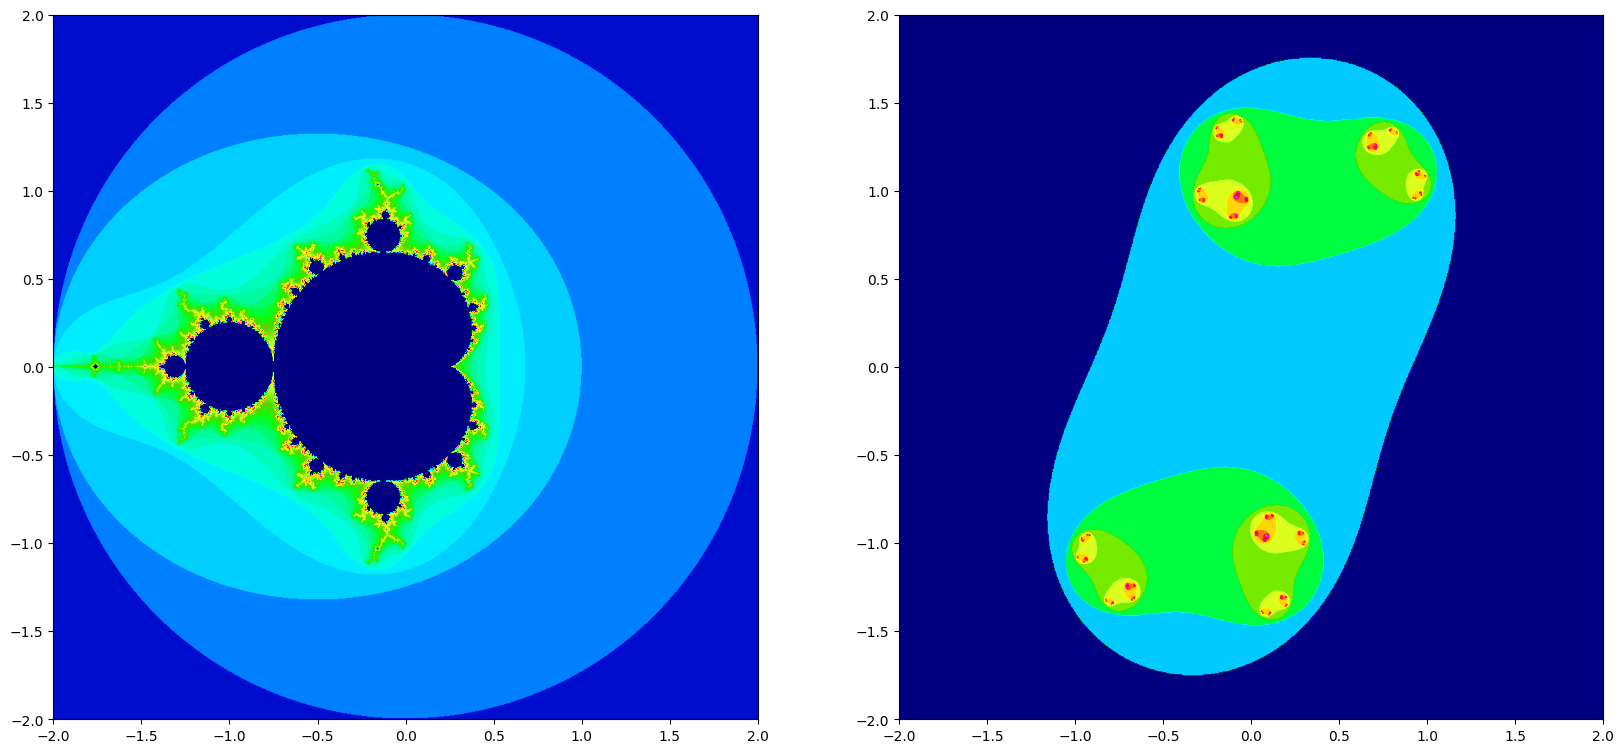

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(
    np.sqrt(draw_mandelbrot(-2, 2, -2, 2, 1000)),
    extent=[-2, 2, -2, 2],
    cmap="gist_ncar",
)
ax2.imshow(
    np.sqrt(draw_julia(-2, 2, -2, 2, 1+0.8j, 1000)),
    extent=[-2, 2, -2, 2],
    cmap="gist_ncar",
)
fig.show()

In [95]:
from ipycanvas import Canvas

cs = Canvas(width=1600, height=800)
im = draw_mandelbrot(-2, 2, -2,2, 800)
im2 = np.sqrt(np.stack([np.ones_like(im), np.ones_like(im), im], axis=2)/ np.max(im))*255
im = draw_julia(-2, 2,-2,2,0.8j, 800)
im3 = np.sqrt(np.stack([im, im, im], axis=2)/ np.max(im))*255
cs.put_image_data(im2, 0,0)
cs.put_image_data(im3,800,0)
cs

mandel 1 t: 0.33742547035217285
julia t: 0.12573695182800293


Canvas(height=800, width=1600)

RFBOutputContext()

mandel 1 t: 0.24477314949035645


CanvasBackend(css_height='800px', css_width='800px')
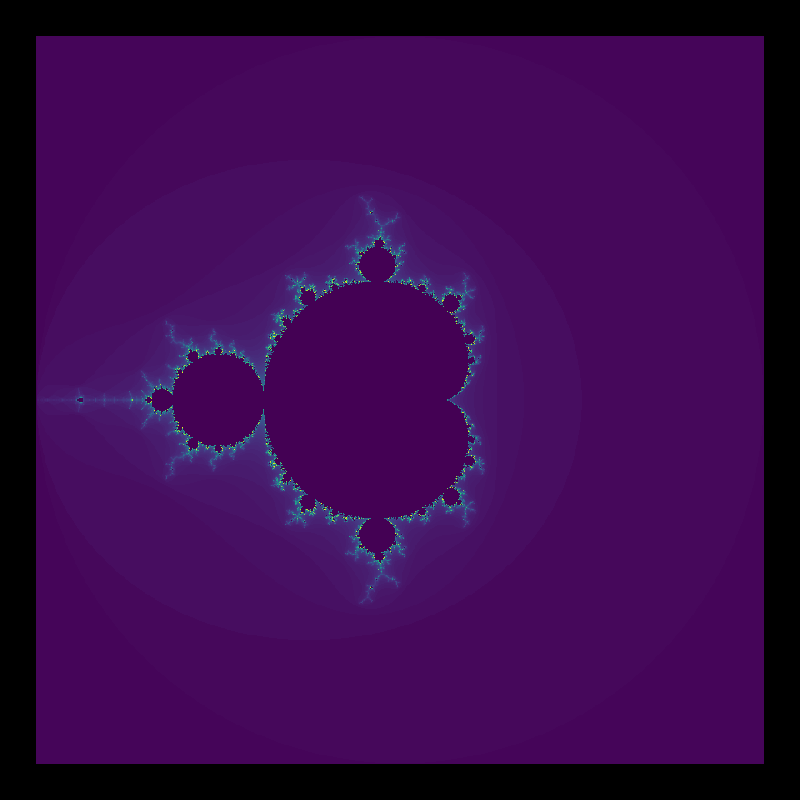

In [7]:
from IPython.display import display
from vispy import scene
from vispy.visuals.transforms import STTransform

canvas = scene.SceneCanvas(keys='interactive')
canvas.size = 800, 800
canvas.show()

# Set up a viewbox to display the image with interactive pan/zoom
view = canvas.central_widget.add_view()

# Create the image
interpolation = 'nearest'

image = scene.Image(draw_mandelbrot(-2,2,-2,2, 800), interpolation=interpolation,
                            parent=view.scene, method='subdivide')

canvas.title = 'Spatial Filtering using %s Filter' % interpolation

# Set 2D camera (the camera will scale to the contents in the scene)
view.camera = scene.PanZoomCamera(aspect=1)
# flip y-axis to have correct aligment
view.camera.flip = (0, 1, 0)
view.camera.set_range()

# get interpolation functions from Image
names = image.interpolation_functions
names = sorted(names)
act = 17


# Implement key presses
@canvas.events.key_press.connect
def on_key_press(event):
    global act
    if event.key in ['Left', 'Right']:
        if event.key == 'Right':
            step = 1
        else:
            step = -1
        act = (act + step) % len(names)
        interpolation = names[act]
        image.interpolation = interpolation
        canvas.title = 'Spatial Filtering using %s Filter' % interpolation
        canvas.update()



display(canvas)